In [80]:
# Construct a pandas DataFrame using `read()`
import pandas as pd

df = pd.read_csv("./datasets/bbc_text_cls.csv")
df

,text,labels
0,Ad sales boost Time Warner profit\n\nQuarterly...,business
1,Dollar gains on Greenspan speech\n\nThe dollar...,business
2,Yukos unit buyer faces loan claim\n\nThe owner...,business
3,High fuel prices hit BA's profits\n\nBritish A...,business
4,Pernod takeover talk lifts Domecq\n\nShares in...,business
...,...,...
2220,BT program to beat dialler scams\n\nBT is intr...,tech
2221,Spam e-mails tempt net shoppers\n\nComputer us...,tech
2222,Be careful how you code\n\nA new European dire...,tech
2223,US cyber security chief resigns\n\nThe man mak...,tech


# 1. Vocabulary
Create **Vocabulary** dictionaries:
- **word2idx:** All the unique words as keys with a corresponding unique ID as values.
- **idx2word:** The reverse of word2idx. It has the unique IDs as keys and their corresponding words as values.

In [88]:
# Create a set of unique words in the corpus
import random

unique_words = set()
for doc in df["text"]:
    for word in doc.split():
        unique_words.add(word.lower())

# Sample 100 words
print(random.sample(tuple(unique_words), 100))

["elite's", 'reidar', 'jr.', 'overdose', '1969', 'abating', 'giscard', 'calder.', 'brive', 'confident,"', 'hope.', 'reception,', 'comic', 'gigs.', 'gratitude', 'cvs', 'busted.', 'manager,"', 'mermaid.', "benitez's", 'privatised', 'blowing', '(egypt)', 'confirmed', '$37bn.', 'zooms.', 'nationalist.', 'dave', "'tricks'", 'familiarity', 'geijsen,', "'set", 'pay-day', 'gebremariam', 'compatriot', 'nhs.', 'michael', 'custody.', 'acquired', 'lille', 'together', 'pointsec,', 'eerie,', 'lcds', '($291m;', 'accumulate', 'borders', '(£4,745', 'record".', 'doughnuts', 'harley,', 'swindon:', 'supporters)', 'behave', 'countryside.', 'bedroom', 'silvia', 'videoing', 'fourth,', 'expectancy', 'fine', 'conveniently', 'recalling', 'equip', 'kos', 'students,"', 'tonne,', "telewest's", 'serena)', 'isabelle', 'unabated.', 'committee]', 'trafford', 'seven-page', 'santoro', 'faith-based', '"wishful', 'kursk', 'suits', 'designing', "twin'", "candidate's", 'pyykkonen.', '"sufficient', 'mccabe', '"pre-masters"',

In [89]:
# Convert the set into a list
vocabulary = list(unique_words)
print(vocabulary[:100])

['enemies.', 'integration', 'manon', 'hiv-positive', 'laughing', 'misfeasance', "'head'", 'from????', 'shaken.', 'ears."', 'dvd-like', 'worse-than-expected', 'criticises', 'faraj,', 'together,"', 'tap', 'hounds,', 'mawrey', 'rooney.', 'warner,', 'battling.', 'state-of-the-art', 'anywhere.', 'sixth-form', '"venerable"', 'entitled', 'explosive', '43%.', 'gartner,downloaded', 'eads', 'tick', 'abbott,', "mccarthy's", 'adolf', '"political', 'screen.', 'return,', 'redirected', 'grants-in-aid', 'property.', 'clockwork', 'on-demand,', 'heritage.', 'force".', "buerk's", 'shape".', 'better"', 'soldier.', 'high-spec', 'artgarden,', 'opec,', 'tape', 'czink', 'perhaps', 'seville', 'cadbury,', 'this,', 'struggle"', 'latch', 'exclusively', "tigers'", 'exist."', 'pull', 'receive,', 'bullock', 'householders', 'sport,"', 'vieira.', 'australian-born', 'commands.', 'condemn', 'unit,', 'hear', 'humour', '(glasgow,', 'credits', 'terminals.', 'errera,', '105.6', 'fredericks', 'clubs.', '6ft', 'shake', 'conte

## 1-1. word2idx

In [90]:
# Create a dictionary to map each unique word to an index
import itertools

word2idx = {}
for idx, word in enumerate(vocabulary):
    word2idx[word] = idx + 1

# Return first 100 items
print(list(itertools.islice(word2idx.items(), 100)))

[('enemies.', 1), ('integration', 2), ('manon', 3), ('hiv-positive', 4), ('laughing', 5), ('misfeasance', 6), ("'head'", 7), ('from????', 8), ('shaken.', 9), ('ears."', 10), ('dvd-like', 11), ('worse-than-expected', 12), ('criticises', 13), ('faraj,', 14), ('together,"', 15), ('tap', 16), ('hounds,', 17), ('mawrey', 18), ('rooney.', 19), ('warner,', 20), ('battling.', 21), ('state-of-the-art', 22), ('anywhere.', 23), ('sixth-form', 24), ('"venerable"', 25), ('entitled', 26), ('explosive', 27), ('43%.', 28), ('gartner,downloaded', 29), ('eads', 30), ('tick', 31), ('abbott,', 32), ("mccarthy's", 33), ('adolf', 34), ('"political', 35), ('screen.', 36), ('return,', 37), ('redirected', 38), ('grants-in-aid', 39), ('property.', 40), ('clockwork', 41), ('on-demand,', 42), ('heritage.', 43), ('force".', 44), ("buerk's", 45), ('shape".', 46), ('better"', 47), ('soldier.', 48), ('high-spec', 49), ('artgarden,', 50), ('opec,', 51), ('tape', 52), ('czink', 53), ('perhaps', 54), ('seville', 55), ('

# 2. One-Hot Encoding
The process of one-hot encoding involves **Vocabulary Creation** & **Vector Representation** two steps.

1. Manual Implementation.
2. `pandas.get_dummies(data, prefix=None, prefix_sep='_', dummy_na=False, columns=None, sparse=False, drop_first=False, dtype=None)`
3. `sklearn.preprocessing.OneHotEncoder(*, categories='auto', drop=None, sparse_output=True, dtype=<class 'numpy.float64'>, handle_unknown='error', min_frequency=None, max_categories=None, feature_name_combiner='concat')`
4. `tf.keras.utils.to_categorical(x, num_classes)`

Disadvantages:
- Sparcity.
- Not fixed size. Need to handle padding manually.
- Does not capture semantics.

## 2-1. Manual One-Hot Encoding
Each word is represented as a vector of `0`s and `1`s. The length of the vector is equal to the size of the vocabulary. Position in the vector corresponds to a specific word in the vocabulary. If the word is present in a particular text sample, its corresponding position in the vector is marked as `1`, and all other positions are `0`. This implies that each word is uniquely represented by a binary vector, with only one element being `1`, indicating its presence, and all others being `0`.

In [57]:
# Add `<unk>` & `<pad>` to vocabulary and word2idx
vocabulary.insert(0, '<pad>')
vocabulary.append('<unk>')

word2idx['<pad>'] = 0
word2idx['<unk>'] = max(word2idx.values()) + 1

print("Index of <pad>:", word2idx['<pad>'])
print("Index of <unk>:", word2idx['<unk>'])

Index of <pad>: 0
Index of <unk>: 60617


In [6]:
# Create one-hot encoded vectors for each word in the corpus
import numpy as np

one_hot_vector = []
for doc in df['text']:
    doc_vector = []
    for word in doc.split():
        vector = np.zeros(len(vocabulary))
        vector[word2idx[word.lower()]] = 1
        doc_vector.append(vector)
    one_hot_vector.append(doc_vector)

# One-hot encoded vectors of the first 10 words from the first document
for i in range(10):
    print(one_hot_vector[0][i])

[0. 0. 0. ... 0. 0. 0.]
[0. 0. 0. ... 0. 0. 0.]
[0. 0. 0. ... 0. 0. 0.]
[0. 0. 0. ... 0. 0. 0.]
[0. 0. 0. ... 0. 0. 0.]
[0. 0. 0. ... 0. 0. 0.]
[0. 0. 0. ... 0. 0. 0.]
[0. 0. 0. ... 0. 0. 0.]
[0. 0. 0. ... 0. 0. 0.]
[0. 0. 0. ... 0. 0. 0.]


## 2-2. One-Hot Encoding with pandas
1. `pandas.get_dummies(data, prefix=None, prefix_sep='_', dummy_na=False, columns=None, sparse=False, drop_first=False, dtype=None)`: Converts categorical variable into dummy or indicator variables.
   - Not require manual word2idx implementation.
   - Add an all falsy `pandas.Series` for the `<pad>` column manually after creating the table.

In [13]:
# Convert the list to `pandas.Series`
import pandas as pd

vocabulary.append('<unk>')

vocabulary_series = pd.Series(vocabulary)
vocabulary_series

0             enemies.
1          integration
2                manon
3         hiv-positive
4             laughing
             ...      
60612    reintegration
60613           that's
60614           halo,"
60615             liam
60616            <unk>
Length: 60617, dtype: object

In [14]:
# `pandas.get_dummies()`
vocabulary_dummies = pd.get_dummies(vocabulary_series)
vocabulary_dummies

,!,"""","""""unconscionable,","""'i","""'oh","""'we","""'you","""(when","""...it","""100%",...,£900m,£910m).,£93.6bn),£933m,£947m,£960m,£98),£99,£9m,"£9m,"
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60612,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
60613,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
60614,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
60615,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [22]:
# Create an all `False` `pandas.Series` for `<pad>`
false_array = np.array([False] * vocabulary_dummies.shape[0])
false_series = pd.Series(false_array)

vocabulary_dummies['<pad>'] = false_series
vocabulary_dummies

,!,"""","""""unconscionable,","""'i","""'oh","""'we","""'you","""(when","""...it","""100%",...,£910m).,£93.6bn),£933m,£947m,£960m,£98),£99,£9m,"£9m,",<pad>
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60612,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
60613,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
60614,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
60615,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [29]:
# Check if `<pad>` the only column contains all `False`
for (column_name, column_data) in vocabulary_dummies.items():
    if (vocabulary_dummies[column_name] == False).all():
        print(column_name)

<pad>


In [31]:
# Check the `<unk>` column
vocabulary_dummies['<unk>']

0        False
1        False
2        False
3        False
4        False
         ...  
60612    False
60613    False
60614    False
60615    False
60616     True
Name: <unk>, Length: 60617, dtype: bool

In [30]:
# One-hot encoding
one_hot_vector = []
for doc in df['text']:
    doc_vector = []
    for word in doc.split():
        doc_vector.append(vocabulary_dummies[word.lower()].values)
    one_hot_vector.append(doc_vector)

# One-hot encoded vectors of the first 10 words from the first document
for i in range(10):
    print(one_hot_vector[0][i])

[False False False ... False False False]
[False False False ... False False False]
[False False False ... False False False]
[False False False ... False False False]
[False False False ... False False False]
[False False False ... False False False]
[False False False ... False False False]
[False False False ... False False False]
[False False False ... False False False]
[False False False ... False False False]


## 2-3. One-Hot Encoding with scikit-learn
1. `sklearn.preprocessing.OneHotEncoder(*, categories='auto', drop=None, sparse_output=True, dtype=<class 'numpy.float64'>, handle_unknown='error', min_frequency=None, max_categories=None, feature_name_combiner='concat')`: Encode categorical features as a one-hot numeric array.
   - Set the `handle_unknown` argument as `ignore` for dealing with `<pad>` or, optionally, `<unk>`. When an unknown category is encountered during transform, the resulting one-hot encoded columns for this feature will be all zeros. In the inverse transform, an unknown category will be denoted as `None`.

In [61]:
# Convert `pandas.Series` to `pandas.DataFrame`
vocabulary_df = vocabulary_series.to_frame()
vocabulary_df

,0
0,enemies.
1,integration
2,manon
3,hiv-positive
4,laughing
...,...
60612,reintegration
60613,that's
60614,"halo,"""
60615,liam


In [62]:
# `OneHotEncoder()`
from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
# vocabulary_encoded = ohe.fit_transform(vocabulary_series.values.reshape(-1, 1))
vocabulary_encoded = ohe.fit(vocabulary_df)
vocabulary_encoded

OneHotEncoder(handle_unknown='ignore', sparse_output=False)

In [63]:
# `OneHotEncoder.categories_`
vocabulary_encoded.categories_

[array(['!', '"', '""unconscionable,', ..., '£99', '£9m', '£9m,'],
       dtype=object)]

In [73]:
# One-hot encoding
one_hot_vector = []
# Take the first row as example
for doc in df['text'][0:1]:
    doc_vector = []
    for word in doc.lower().split():
        doc_vector.append(ohe.transform(np.array(word).reshape(1, -1)))
    one_hot_vector.append(doc_vector)

# One-hot encoded vectors of the first 10 words from the first document
for i in range(10):
    print(one_hot_vector[0][i])

[[0. 0. 0. ... 0. 0. 0.]]
[[0. 0. 0. ... 0. 0. 0.]]
[[0. 0. 0. ... 0. 0. 0.]]
[[0. 0. 0. ... 0. 0. 0.]]
[[0. 0. 0. ... 0. 0. 0.]]
[[0. 0. 0. ... 0. 0. 0.]]
[[0. 0. 0. ... 0. 0. 0.]]
[[0. 0. 0. ... 0. 0. 0.]]
[[0. 0. 0. ... 0. 0. 0.]]
[[0. 0. 0. ... 0. 0. 0.]]


## 2-4. One-Hot Encoding with Keras
1. `tensorflow.keras.utils.to_categorical(x, num_classes=None)`: Converts a class vector (integers) to binary class matrix.

In [91]:
# Add `<unk>` to vocabulary and word2idx; `<pad>` to word2idx
vocabulary.append('<unk>')

word2idx['<pad>'] = 0
word2idx['<unk>'] = max(word2idx.values()) + 1

print("Index of <pad>:", word2idx['<pad>'])
print("Index of <unk>:", word2idx['<unk>'])

Index of <pad>: 0
Index of <unk>: 60617


In [92]:
# Split documents to tokens
tokens_docs = [doc.lower().split() for doc in df['text']]

# Convert token lists to token-id lists
token_ids = [[word2idx[token] for token in tokens_doc] for tokens_doc in tokens_docs]
print(token_ids[0])

[39577, 33430, 52459, 54325, 9836, 20365, 39975, 59367, 33894, 56817, 16322, 46887, 14733, 39325, 8260, 22107, 57262, 41629, 10287, 37806, 46168, 55214, 22107, 20849, 32423, 37588, 40828, 37806, 23588, 47283, 27636, 5783, 28397, 33095, 37806, 55463, 25457, 42787, 38299, 24049, 32423, 33430, 33095, 40296, 23223, 37517, 57839, 46472, 15599, 3132, 14733, 52312, 59647, 32818, 33430, 5061, 36444, 22107, 29233, 32423, 35640, 47693, 59367, 21580, 22539, 57185, 23362, 14873, 47283, 49645, 42653, 20365, 59784, 33894, 9836, 35120, 57839, 49827, 15534, 10287, 57865, 54325, 9836, 52312, 55996, 15175, 23702, 34648, 5783, 29241, 21169, 33095, 1933, 42644, 58423, 47693, 9481, 23223, 3298, 29121, 14651, 32635, 45947, 54299, 34648, 24052, 28527, 55613, 42787, 37806, 59647, 32818, 59367, 21580, 9995, 36841, 42787, 37806, 47262, 46168, 1637, 38182, 37806, 24161, 52312, 51883, 11271, 20365, 43803, 59809, 20394, 5061, 21169, 55996, 37806, 41168, 33095, 7684, 23223, 12829, 37549, 34648, 49602, 22107, 20815,

In [93]:
# `to_categorical()`
import keras

vocabulary_to_categorical = keras.utils.to_categorical(list(range(len(vocabulary))), num_classes=len(vocabulary))
vocabulary_to_categorical

array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 1.]])

In [97]:
# Add an all zero vector for `<pad>`
vocabulary_to_categorical = np.insert(vocabulary_to_categorical, 0, np.zeros(len(vocabulary_to_categorical[0])), axis=0)
vocabulary_to_categorical

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 1.]])

In [100]:
# One-hot encoding
one_hot_vector = []
for doc in df['text']:
    doc_vector = []
    for word in doc.lower().split():
        doc_vector.append(vocabulary_to_categorical[word2idx[word]])
    one_hot_vector.append(doc_vector)

# One-hot encoded vectors of the first 10 words from the first document
for i in range(10):
    print(one_hot_vector[0][i])

[0. 0. 0. ... 0. 0. 0.]
[0. 0. 0. ... 0. 0. 0.]
[0. 0. 0. ... 0. 0. 0.]
[0. 0. 0. ... 0. 0. 0.]
[0. 0. 0. ... 0. 0. 0.]
[0. 0. 0. ... 0. 0. 0.]
[0. 0. 0. ... 0. 0. 0.]
[0. 0. 0. ... 0. 0. 0.]
[0. 0. 0. ... 0. 0. 0.]
[0. 0. 0. ... 0. 0. 0.]


# 3. Bag-of-Words (BoW)
A document is represented as the bag (multiset) of its words, disregarding grammar and even word order but keeping multiplicity. It involves creating a vocabulary of known words & a measure of the presence of them.

Disadvantages:
- Sparcity.
- Out of vocabulary situation.
- Not consider ordering.
## 3-1. Manual Implementation

## 3-2. CountVectorizer of scikit-learn
1. `sklearn.feature_extraction.text.CountVectorizer(*, input='content', encoding='utf-8', decode_error='strict', strip_accents=None, lowercase=True, preprocessor=None, tokenizer=None, stop_words=None, token_pattern='(?u)\\b\\w\\w+\\b', ngram_range=(1, 1), analyzer='word', max_df=1.0, min_df=1, max_features=None, vocabulary=None, binary=False, dtype=<class 'numpy.int64'>)`: Converts a collection of text documents to a matrix of token counts.
   - `analyzer`: Decides whether the feature should be made of word n-gram or character n-grams.
   - `token_pattern`: You can customize it to preserve punctuation.

In [109]:
# `CountVectorizer()`
from sklearn.feature_extraction.text import CountVectorizer

count_vectorizer = CountVectorizer()
bow = count_vectorizer.fit_transform(df["text"])
print(bow.toarray())

[[0 1 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 1 0 ... 0 0 0]]


In [111]:
# `get_feature_names_out()`
words = count_vectorizer.get_feature_names_out()
print(words)

['00' '000' '0001' ... 'zutons' 'zvonareva' 'zvyagintsev']


In [110]:
# `vocabulary_`
print(list(itertools.islice(count_vectorizer.vocabulary_.items(), 10)))

[('ad', 1750), ('sales', 23062), ('boost', 4349), ('time', 26665), ('warner', 28502), ('profit', 20825), ('quarterly', 21204), ('profits', 20832), ('at', 2994), ('us', 27901)]


In [114]:
# (len(df['text']), len(count_vectorizer.vocabulary_))
bow.shape

(2225, 29421)

# 4. N-Gram

# 5. TF-IDF
## 5-1. Manual Implementation
### 5-1-1. word2idx

In [ ]:
import nltk
nltk.download('punkt')

In [ ]:
from nltk import word_tokenize

words = word_tokenize(df["text"][0])
print(words)

In [ ]:
# Populate word2idx
# Convert documents into sequences of ints / ids / indices
idx = 0
word2idx = {}
tokenized_docs = []

for doc in df["text"]:
    words = word_tokenize(doc.lower())
    doc_as_int = []
    for word in words:
        if word not in word2idx:
            word2idx[word] = idx
            idx += 1
        # Save for later
        doc_as_int.append(word2idx[word])
    tokenized_docs.append(doc_as_int)

tokenized_docs

### 5-1-2. idx2word

In [ ]:
# Reverse mapping
idx2word = {v:k for k, v in word2idx.items()}
idx2word

In [ ]:
# Number of documents
N = len(df['text'])

# Number of words
V = len(word2idx)

N, V

### 5-1-3. Term Frequency (TF)
**Term frequency (TF)** means how often a term occurs in a document.

In [ ]:
import numpy as np

# Instantiate term-frequency matrix
tf = np.zeros((N, V))

# Populate term-frequency counts
for i, doc_as_int in enumerate(tokenized_docs):
    for j in doc_as_int:
        tf[i, j] += 1

tf

### 5-1-4. Inverse Document Frequency (IDF)
- **Document frequency (DF)** is the number of documents containing a particular term.
- **Inverse Document Frequency (IDF)** is a weight indicating how commonly a word is used.

In [ ]:
# Compute IDF
# `axis=0` is the direction running downward the rows
doc_freq = np.sum(tf > 0, axis=0)
idf = np.log(N / doc_freq)
idf

In [ ]:
### TF-IDF

In [ ]:
# Compute TF-IDF
tf_idf = tf * idf
tf_idf

In [ ]:
# Pick a random document, show the top 5 terms (in terms of `tf_idf` score)
np.random.seed(36)
i = np.random.choice(N)
row = df.iloc[i]
print("Label:", row['label'])
print("Text:", row['text'].split("\n", 1)[0])
print("Top 5 terms:")

scores = tf_idf[i]
# Add minus for descending
indices = (-scores).argsort()
for j in indices[:5]:
    print(idx2word[j])

## 3-2. CountVectorizer
Derived term frequencies from `CountVectorizer`.

In [ ]:
inputs = df["text"]
labels = df["label"]

labels.hist(figsize=(10, 5));

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer()
tf = vectorizer.fit_transform(inputs)
words = vectorizer.get_feature_names_out()
print(words)

In [ ]:
tf

In [ ]:
print(tf.toarray())

In [ ]:
# Fewer words than `nltk.word_tokenize()`
tf.shape

In [ ]:
# By default `lowercase=True`
# np.where(words == "India")
# (array([], dtype=int64),)

# By default `token_pattern=r”(?u)\b\w\w+\b`
# RegExp selects tokens of 2 or more alphanumeric characters (punctuation is completely ignored and always treated as a token separator)
# np.where(words == "$")
# (array([], dtype=int64),)

np.where(words == "india")

In [ ]:
# Same as `tf[0][0]` in the above section
tf.toarray()[0][13907]

In [ ]:
# Compute IDF
doc_freq = np.sum(tf.toarray() > 0, axis=0)
idf = np.log(N / doc_freq)
idf

In [ ]:
# Compute TF-IDF
tf_idf = tf.toarray() * idf
tf_idf

In [ ]:
tf_idf.shape

In [ ]:
# Same as `tf_idf[0][0]` in the above section
tf_idf[0][13907]

## 3-3. TfidfTransformer

In [ ]:
from sklearn.feature_extraction.text import TfidfTransformer

transformer = TfidfTransformer()
tf_idf = transformer.fit_transform(tf)
words = vectorizer.get_feature_names_out()
print(words)

In [ ]:
tf_idf

In [ ]:
# The `sklearn` implementation of TF-IDF is different from our manual implementation 
print(tf_idf.toarray())

## 3-4. TfidfVectorizer

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer()
tf_idf = vectorizer.fit_transform(inputs)
words = vectorizer.get_feature_names_out()
print(words)

In [ ]:
tf_idf

In [ ]:
# Same as `CountVectorizer()` followed by `TfidfTransformer()`
print(tf_idf.toarray())

Perform classification.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB

inputs_train, inputs_test, y_train, y_test = train_test_split(inputs, labels, random_state=36)

vectorizer = CountVectorizer()

x_train = vectorizer.fit_transform(inputs_train)
x_test = vectorizer.transform(inputs_test)

model = MultinomialNB()
model.fit(x_train, y_train)

print("Train Score:", model.score(x_train, y_train))
print("Test Score:", model.score(x_test, y_test))

# 4. word2vec
## 4-1. CBOW (Continuous Bag of Words)
## 4-2. Skip-Gram (SG)
- [Gensim Migration Guide](https://github.com/piskvorky/gensim/wiki/Migrating-from-Gensim-3.x-to-4)

In [135]:
from gensim.models import KeyedVectors

wv = KeyedVectors.load_word2vec_format("models/wiki.en.vec")

In [136]:
len(wv.key_to_index)

2519370

In [137]:
vec_king = wv.get_vector("king")
vec_man = wv.get_vector("man")
vec_woman = wv.get_vector("woman")
wv.similar_by_vector(vec_king - vec_man + vec_woman, topn=5)

[('king', 0.7955735325813293),
 ('queen', 0.6802901029586792),
 ('princess', 0.5975188612937927),
 ('regnant', 0.5888890027999878),
 ('princesses', 0.5710145831108093)]

In [138]:
wv.most_similar(positive=["king", "woman"], negative=["man"])

[('queen', 0.6606324315071106),
 ('princess', 0.5824028253555298),
 ('regnant', 0.5788114666938782),
 ('princesses', 0.5610353350639343),
 ('consort', 0.5389299988746643),
 ('regnants', 0.5266367793083191),
 ('queenmother', 0.5214956402778625),
 ('monarch', 0.5059499740600586),
 ('‘princess', 0.504895031452179),
 ('parmaprincess', 0.5012947916984558)]

In [139]:
wv.similar_by_vector(vec_king, topn=10)

[('king', 1.0),
 ('kings', 0.6761603951454163),
 ('queen', 0.6493093371391296),
 ('monarch', 0.6260097026824951),
 ('kingship', 0.5977714657783508),
 ('#king', 0.595557689666748),
 ('throne', 0.5953187942504883),
 ('king/king', 0.5743654370307922),
 ('kingly', 0.5734267234802246),
 ('reign', 0.569341242313385)]

In [141]:
vec_berlin = wv.get_vector("berlin")
vec_germany = wv.get_vector("germany")
vec_france = wv.get_vector("france")
wv.similar_by_vector(vec_berlin - vec_germany + vec_france, topn=5)

[('paris', 0.7745824456214905),
 ('berlin', 0.6806361675262451),
 ('france', 0.623436450958252),
 ('grenoblois', 0.6198642253875732),
 ('marseille', 0.6068134307861328)]

In [142]:
countries = ["china",   "russia", "japan", "turkey", "poland", "germany", "france", "italy", "greece", "spain",  "portugal"]
capitals  = ["beijing", "moscow", "tokyo", "ankara", "warsaw", "berlin",  "paris",  "rome",  "athens", "madrid", "lisbon"]

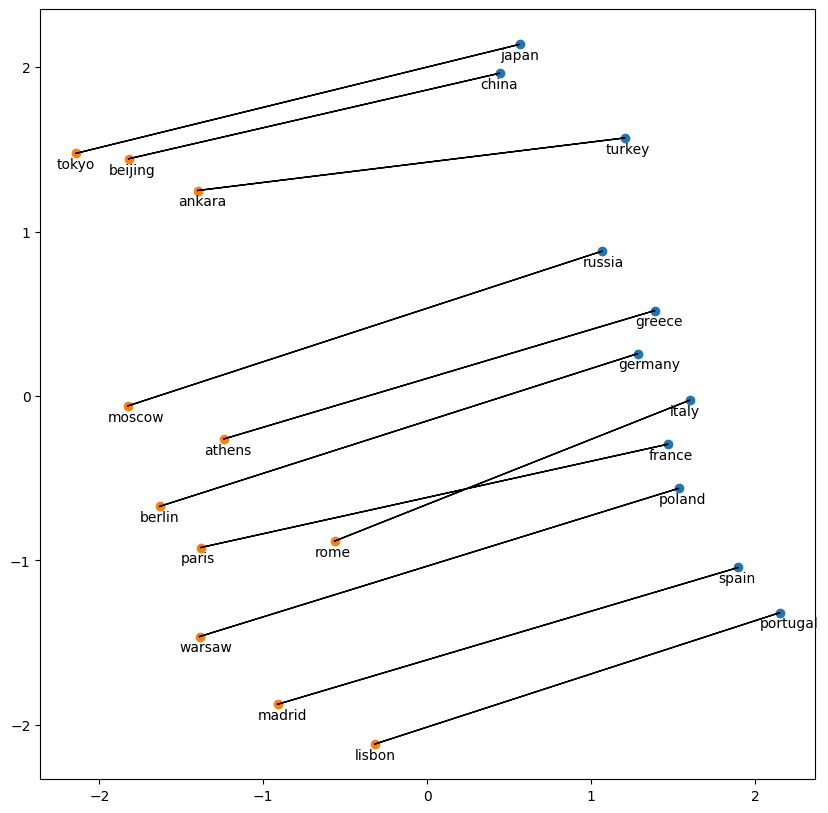

In [143]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

def plot_pairs(wv, a, b):
    ndx_a = [wv.key_to_index[a_i] for a_i in a]
    ndx_b = [wv.key_to_index[b_i] for b_i in b]
    
    pca = PCA(2)
    wv2 = pca.fit_transform(wv.vectors[ndx_a + ndx_b])
    
    wv_a = wv2[:len(ndx_a)]
    wv_b = wv2[len(ndx_a):]
    
    plt.figure(figsize=(10,10))
    plt.scatter(wv_a[:,0], wv_a[:,1])
    plt.scatter(wv_b[:,0], wv_b[:,1])
    
    for i, (p_a, p_b) in enumerate(zip(a,b)):
        plt.annotate(p_a, wv_a[i], xytext=(-20,-15), textcoords="offset pixels")
        plt.annotate(p_b, wv_b[i], xytext=(-20,-15), textcoords="offset pixels")
        
    for i in range(len(wv_a)):
        plt.arrow(wv_a[i,0], wv_a[i,1], wv_b[i,0]-wv_a[i,0], wv_b[i,1]-wv_a[i,1], shape="left")

plot_pairs(wv, countries, capitals)

# 5. GloVe
# 6. FastText
- [English Word Vectors](https://fasttext.cc/docs/en/english-vectors.html)
# 7. Gaussian Embedding
# 8. Pointcare Embedding